In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import  accuracy_score, roc_auc_score, roc_curve, confusion_matrix

In [2]:
Bnk=pd.read_csv("../input/banking-dataset-classification/new_train.csv")
Bnk

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent,no
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure,no
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent,no
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,999,0,nonexistent,no


In [3]:
Bnk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


In [4]:
Bnk.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32950.0,40.014112,10.403636,17.0,32.0,38.0,47.0,98.0
duration,32950.0,258.127466,258.975917,0.0,103.0,180.0,319.0,4918.0
campaign,32950.0,2.560607,2.752326,1.0,1.0,2.0,3.0,56.0
pdays,32950.0,962.052413,187.951096,0.0,999.0,999.0,999.0,999.0
previous,32950.0,0.174719,0.499025,0.0,0.0,0.0,0.0,7.0


In [5]:
Bnk.describe(include="object").T

,count,unique,top,freq
job,32950,12,admin.,8314
marital,32950,4,married,19953
education,32950,8,university.degree,9736
default,32950,3,no,26007
housing,32950,3,yes,17254
loan,32950,3,no,27131
contact,32950,2,cellular,20908
month,32950,10,may,11011
day_of_week,32950,5,thu,6857
poutcome,32950,3,nonexistent,28416


In [6]:
x=0
for i in Bnk.columns:
    print(f'{i},"coulmn_value_count"'+f"num_of_coulmn=\t{x}"+"\t"f"num_of_items_in_each_coulmn\t{len(Bnk[i].value_counts())})\n")
    print(f"\n{Bnk[i].value_counts().to_frame()}")
    x=x+1
    print("*******************")

age,"coulmn_value_count"num_of_coulmn=	0	num_of_items_in_each_coulmn	75)


     age
31  1551
32  1474
33  1443
35  1417
34  1404
..   ...
17     3
89     2
87     1
91     1
98     1

[75 rows x 1 columns]
*******************
job,"coulmn_value_count"num_of_coulmn=	1	num_of_items_in_each_coulmn	12)


                job
admin.         8314
blue-collar    7441
technician     5400
services       3196
management     2345
retired        1366
entrepreneur   1160
self-employed  1099
housemaid       855
unemployed      798
student         711
unknown         265
*******************
marital,"coulmn_value_count"num_of_coulmn=	2	num_of_items_in_each_coulmn	4)


          marital
married     19953
single       9257
divorced     3675
unknown        65
*******************
education,"coulmn_value_count"num_of_coulmn=	3	num_of_items_in_each_coulmn	8)


                     education
university.degree         9736
high.school               7596
basic.9y                  4826
professional.course       4

In [7]:
Bnk.isna().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [8]:
len(Bnk.columns)

16

In [9]:
num_bk=list(Bnk.select_dtypes(include="int64").columns)
num_bk

['age', 'duration', 'campaign', 'pdays', 'previous']

In [10]:
cat_bk=list(Bnk.select_dtypes(exclude="int64").columns)
cat_bk

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [11]:
Bnk[num_bk]

,age,duration,campaign,pdays,previous
0,49,227,4,999,0
1,37,202,2,999,1
2,78,1148,1,999,0
3,36,120,2,999,0
4,59,368,2,999,0
...,...,...,...,...,...
32945,28,192,1,999,0
32946,52,64,1,999,1
32947,54,131,4,999,0
32948,29,165,1,999,0


In [12]:
i=["y"]
num_bk=num_bk+i

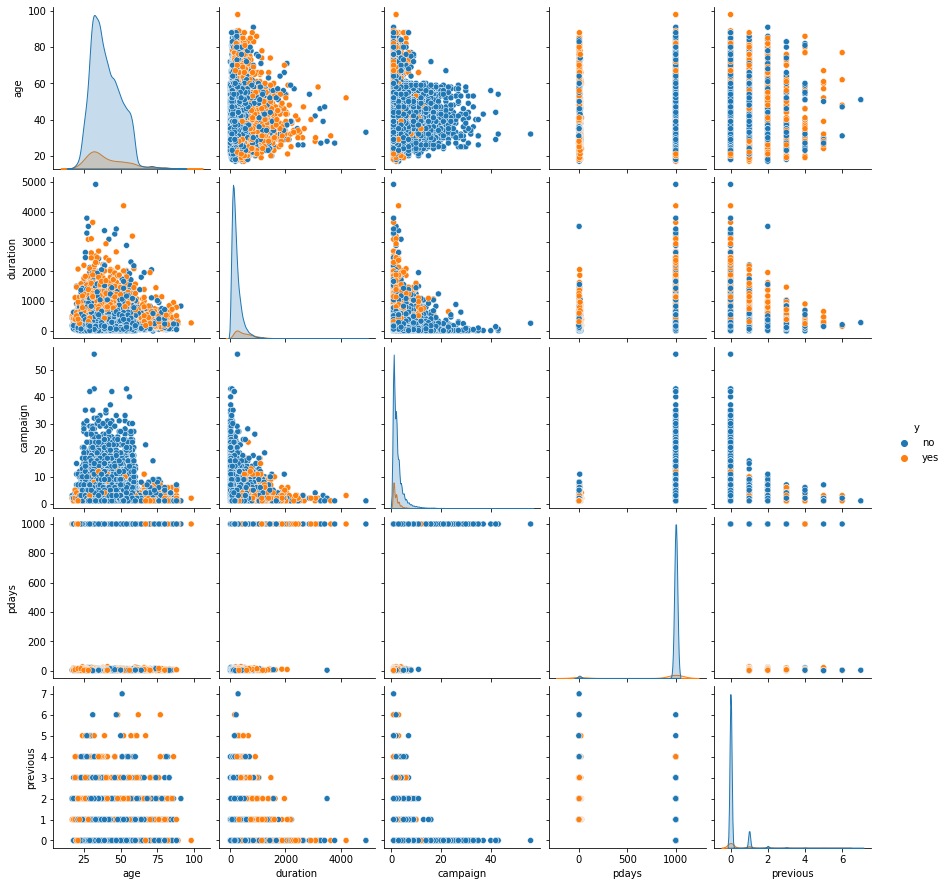

In [13]:
sns.pairplot(data=Bnk[num_bk],hue='y',diag_kind="kde")

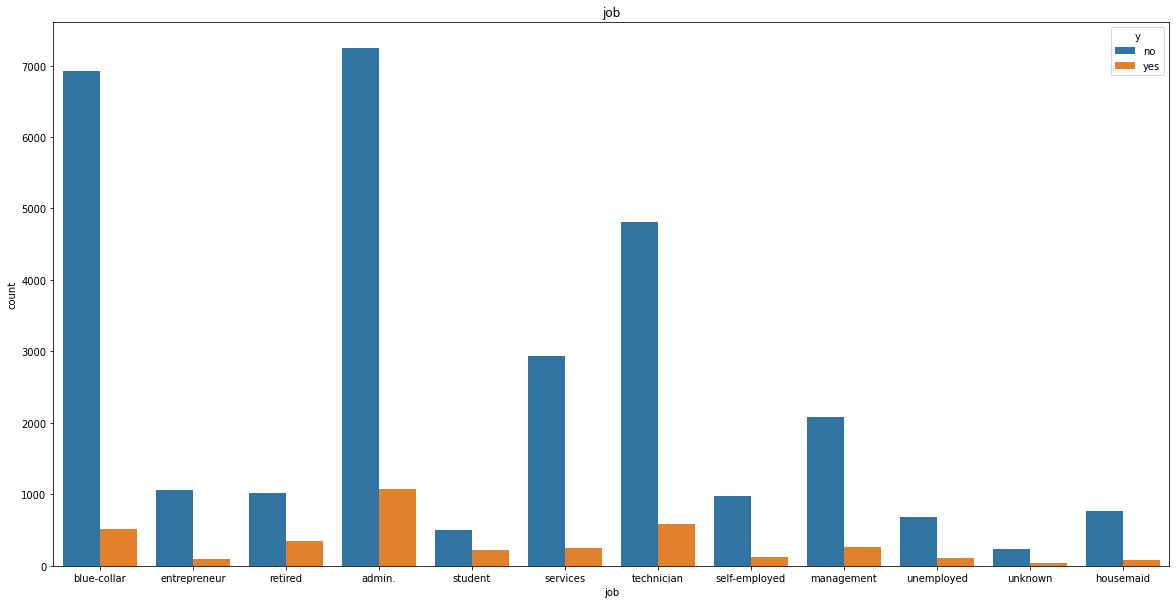

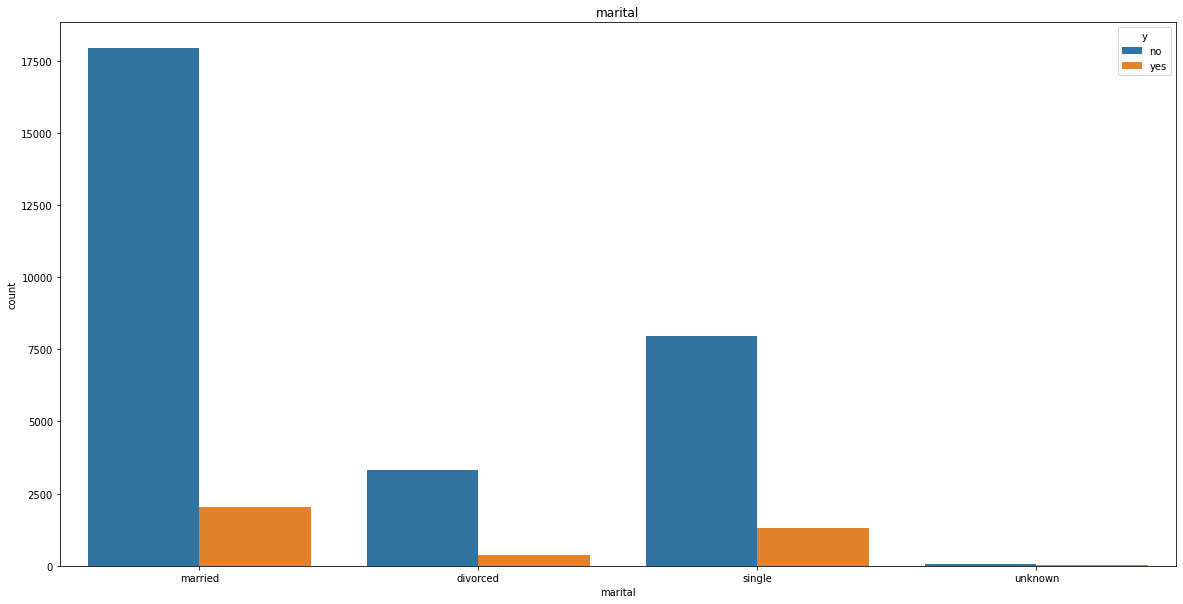

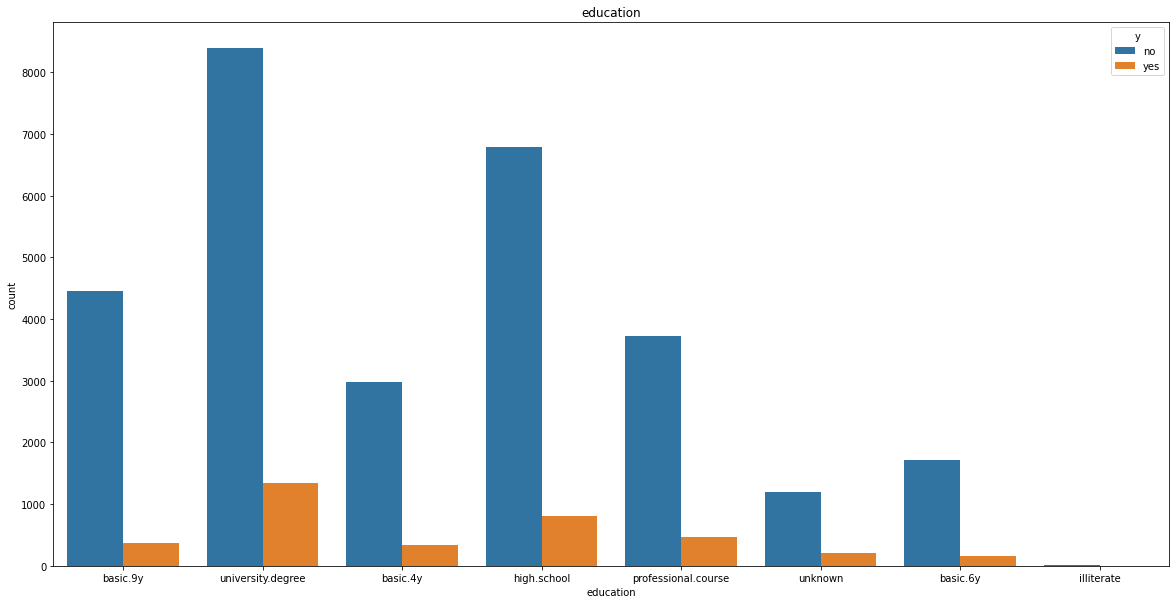

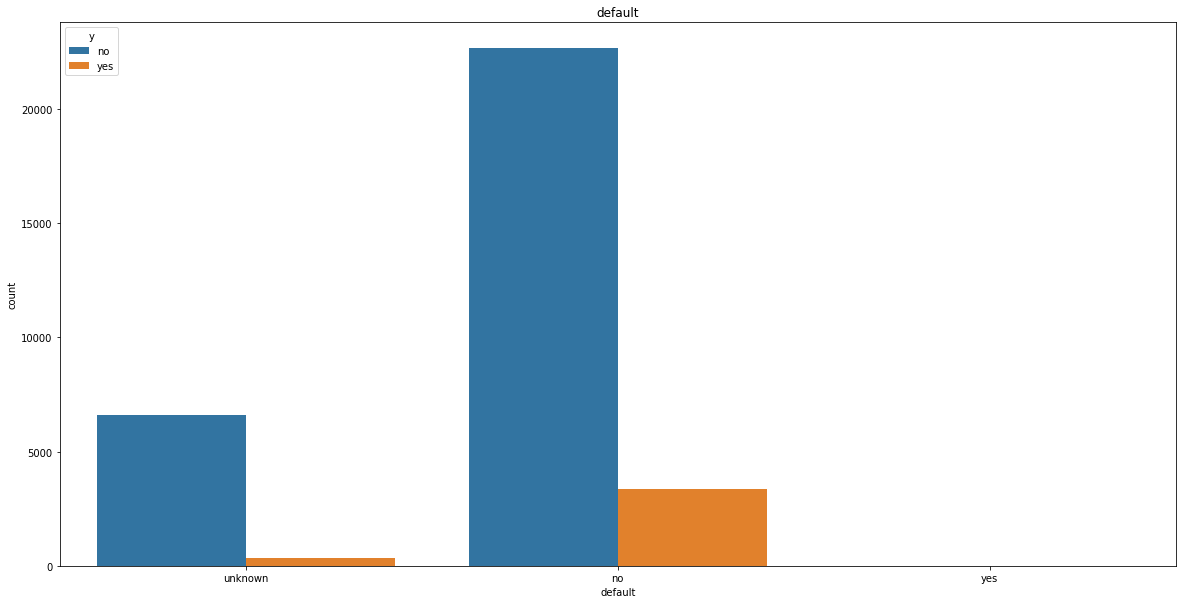

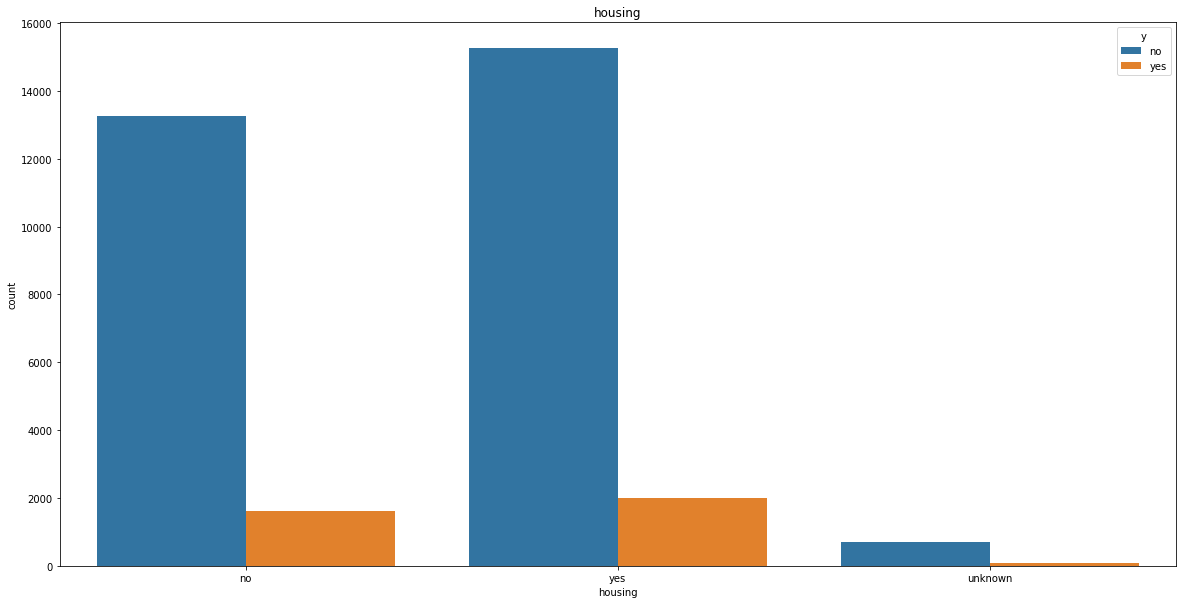

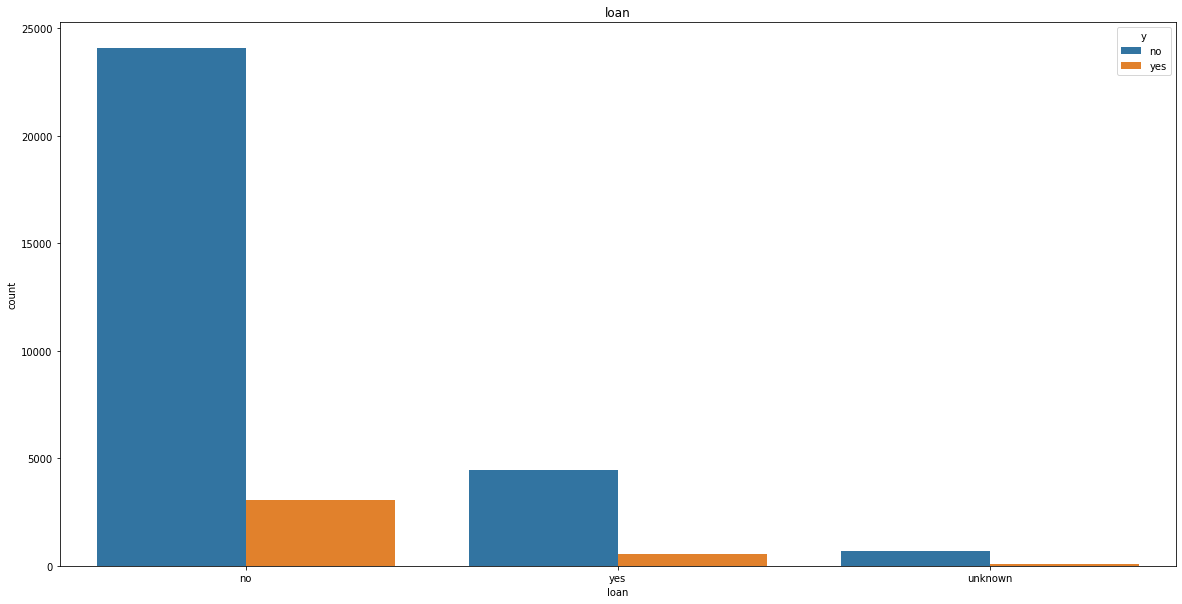

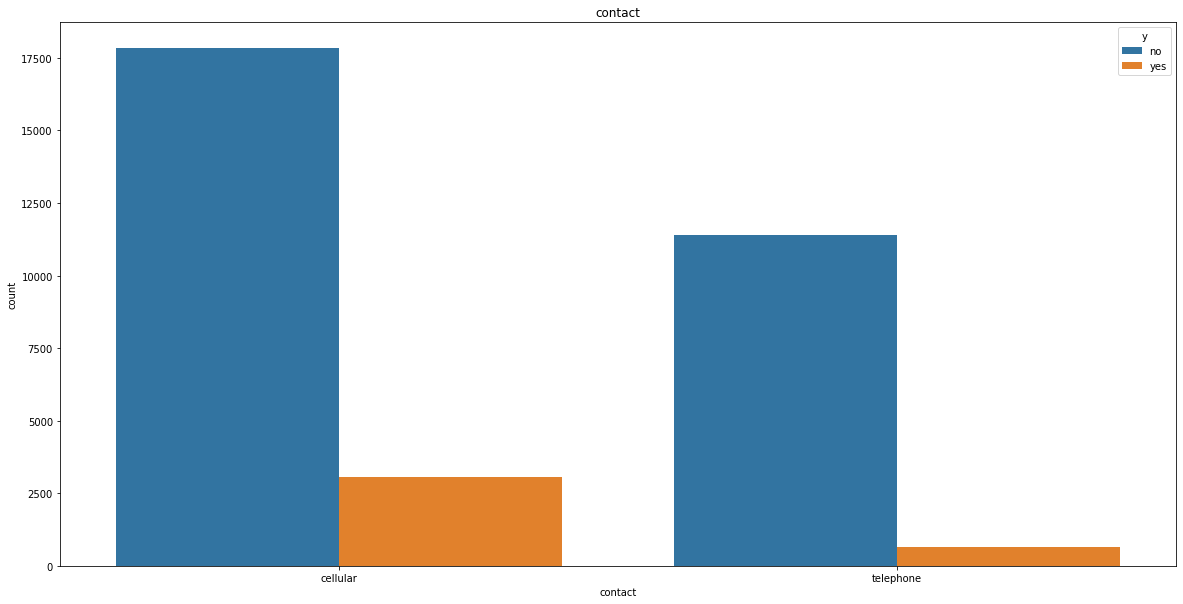

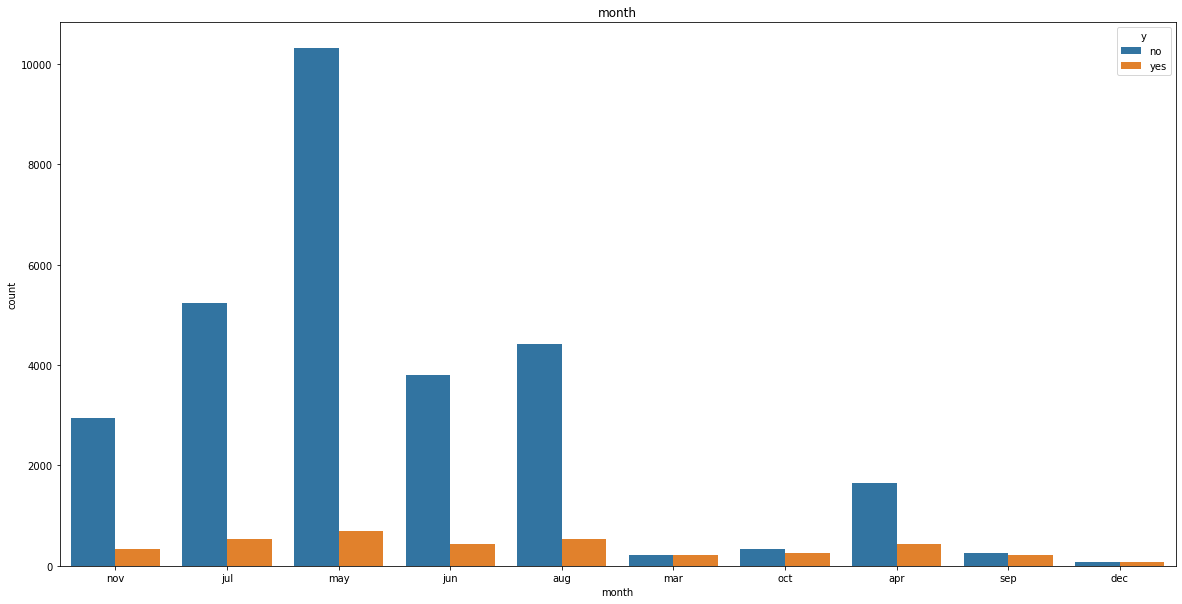

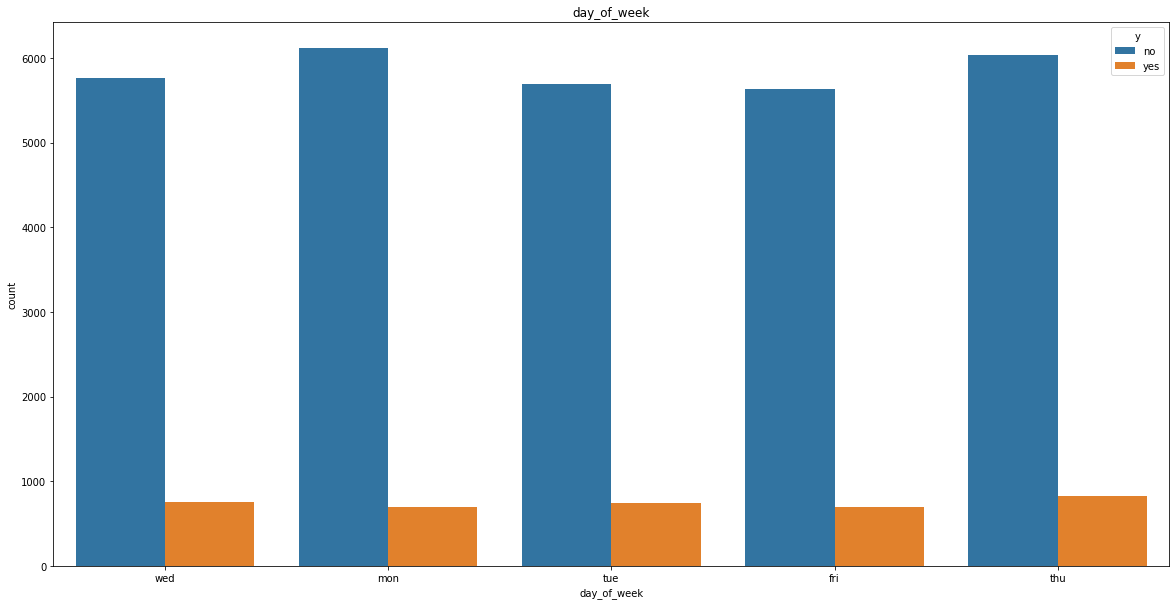

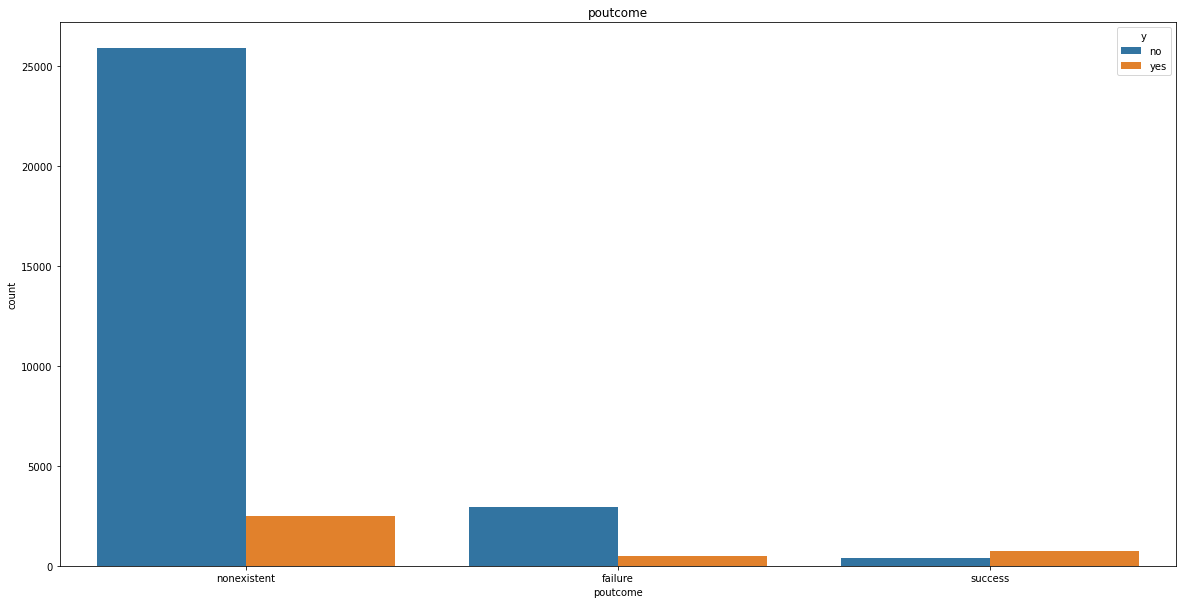

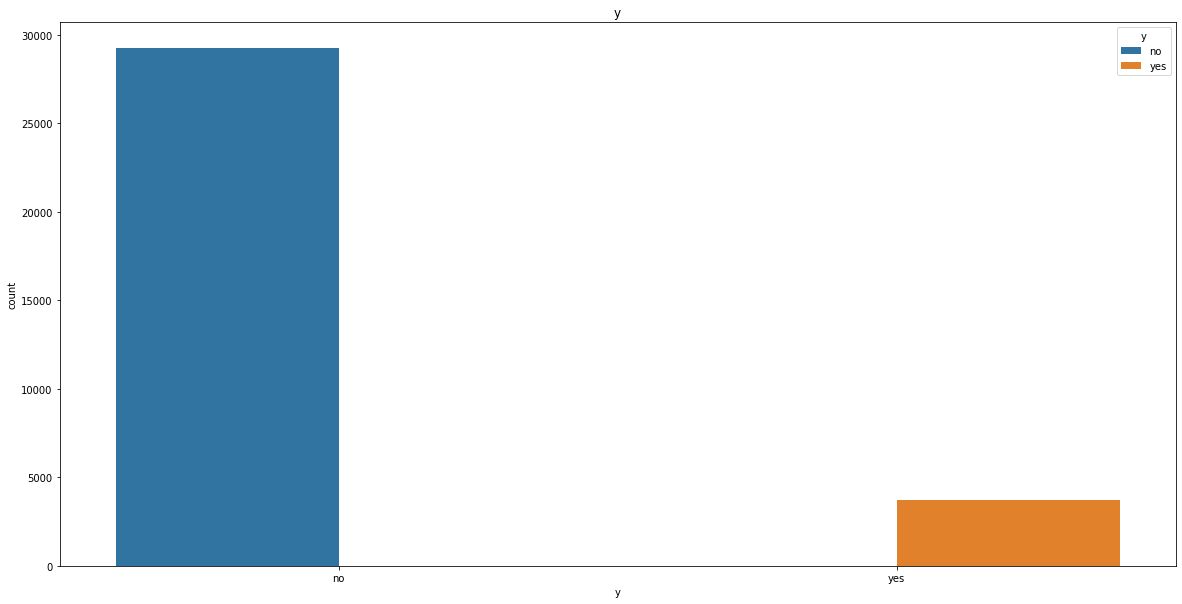

In [14]:
for i in cat_bk:
    plt.figure(figsize=(20,10))
    sns.countplot(x=i, data=Bnk[cat_bk], hue="y")
    plt.title(i)

In [15]:
Bnk.default.value_counts()

no         26007
unknown     6940
yes            3
Name: default, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1440x1440 with 0 Axes>

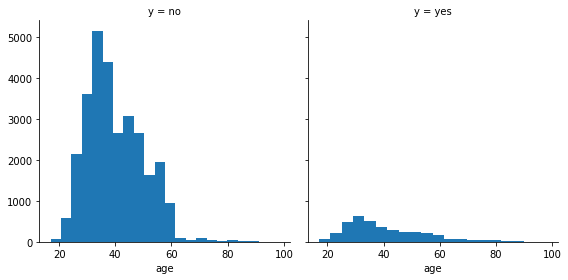

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1440x1440 with 0 Axes>

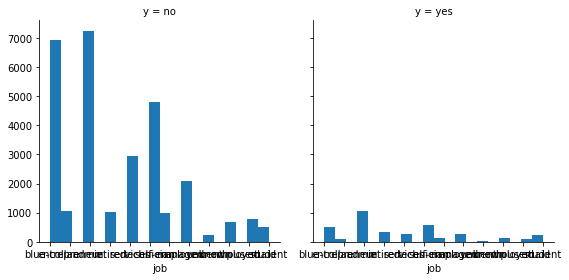

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1440x1440 with 0 Axes>

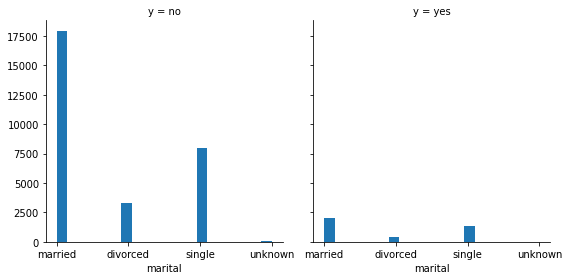

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1440x1440 with 0 Axes>

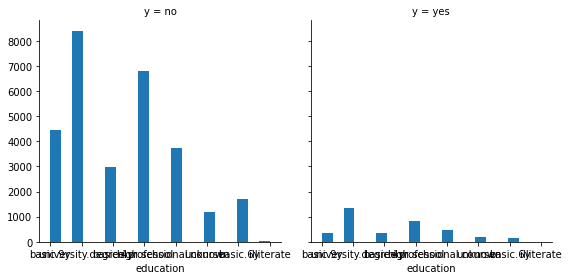

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1440x1440 with 0 Axes>

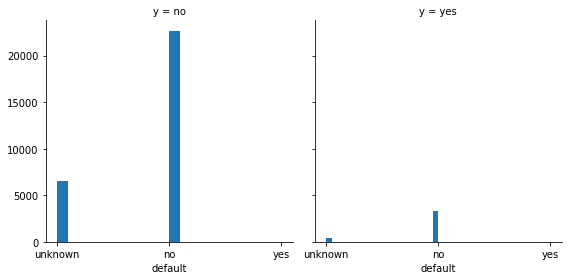

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1440x1440 with 0 Axes>

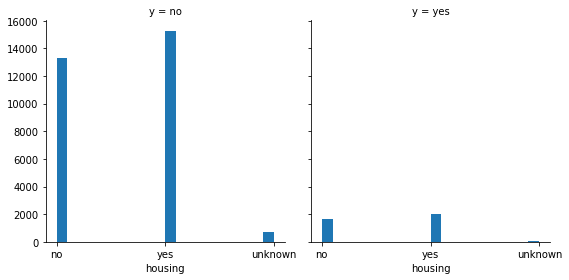

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1440x1440 with 0 Axes>

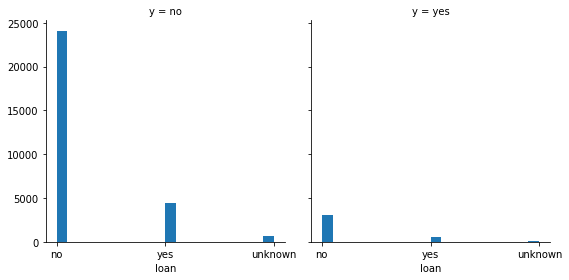

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1440x1440 with 0 Axes>

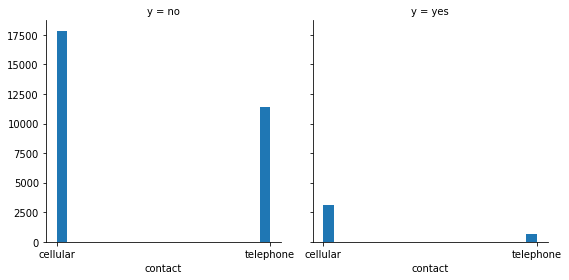

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1440x1440 with 0 Axes>

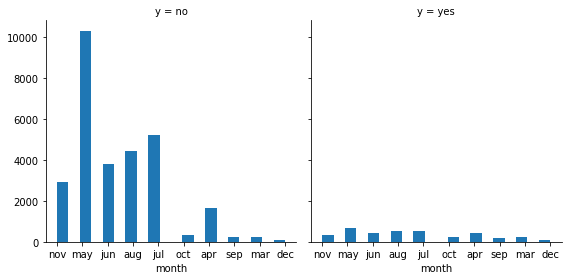

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1440x1440 with 0 Axes>

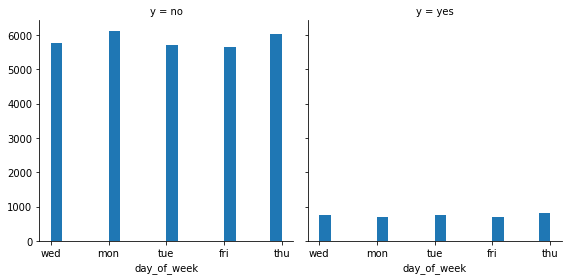

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1440x1440 with 0 Axes>

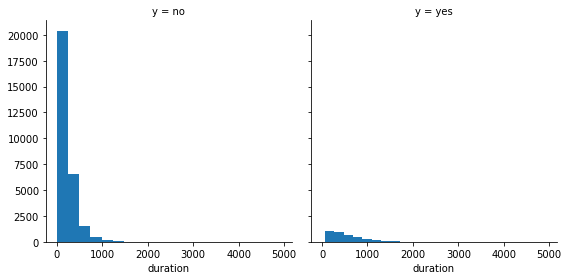

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1440x1440 with 0 Axes>

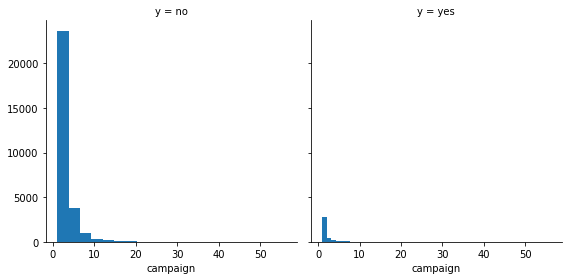

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1440x1440 with 0 Axes>

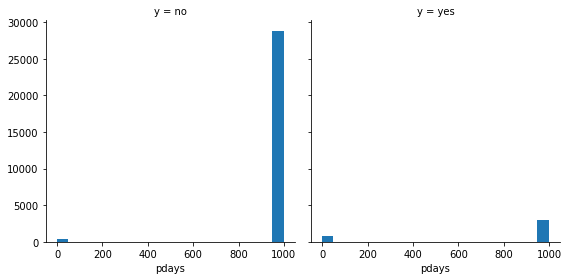

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1440x1440 with 0 Axes>

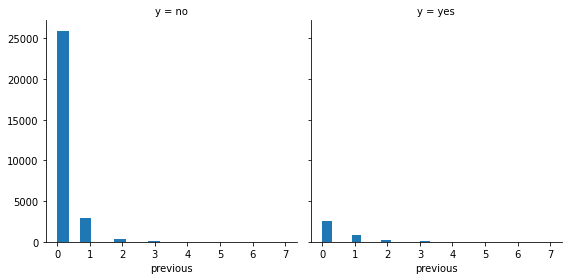

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1440x1440 with 0 Axes>

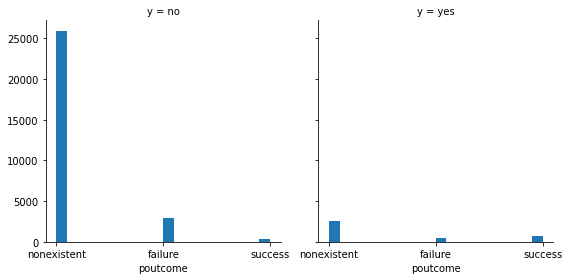

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1440x1440 with 0 Axes>

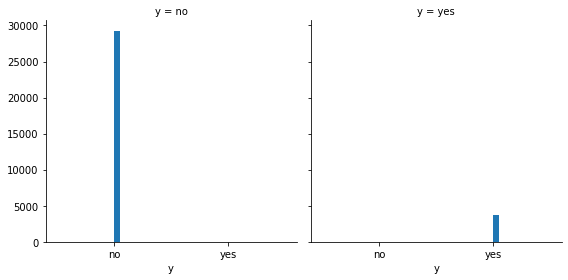

In [16]:
    for n in Bnk:
        
        plt.figure(figsize=(20,20))
        g = sns.FacetGrid(Bnk , col='y' , size=4)
        g.map(plt.hist, n , bins=20)
    
    #plt.title(f"{n} vs Survived", size=15)
        plt.show()

In [17]:
bk=Bnk.copy()
bk

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent,no
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure,no
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent,no
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,999,0,nonexistent,no


<Figure size 3600x2880 with 0 Axes>

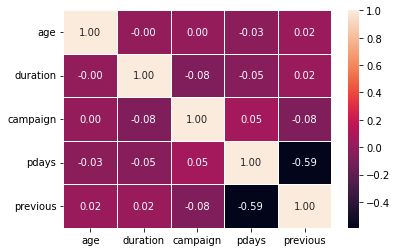

In [18]:
plt.figure(figsize=(50,40))
#sns.heatmap(df.corr(), annot=True, fmt=".1f", linewidths=.7)
plt.show()
sns.heatmap(bk.corr(),annot=True,fmt=".2f",linewidths=.8)
plt.show()

In [19]:

bk4=Bnk.copy()
bk4
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
bk4["y"]=  l.fit_transform( bk4["y"])
bk4
bk4=pd.get_dummies(data=bk,drop_first=True,columns=cat_bk)
bk4

,age,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,49,227,4,999,0,1,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
1,37,202,2,999,1,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,78,1148,1,999,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,1
3,36,120,2,999,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,59,368,2,999,0,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,192,1,999,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
32946,52,64,1,999,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
32947,54,131,4,999,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
32948,29,165,1,999,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [20]:
X=bk4.drop(["y_yes"],axis=1)
y=bk4[["y_yes"]]
X

,age,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,49,227,4,999,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
1,37,202,2,999,1,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,78,1148,1,999,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
3,36,120,2,999,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
4,59,368,2,999,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,192,1,999,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
32946,52,64,1,999,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
32947,54,131,4,999,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
32948,29,165,1,999,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
import time

In [23]:
%%time

supervised={"Log":LogisticRegression(),"Rnf":RandomForestClassifier(),"Knn":KNeighborsClassifier(),"Svm":SVC(),"Dec_t":DecisionTreeClassifier()}
unsup={"Stander":StandardScaler(),"MinMax":MinMaxScaler()}
l1=[]
l2=[]
l3=[]


def fir_res_mod1():
    
    
    for i,t in unsup.items():
        start = time.time()
        #print(start)

        for n,m in supervised.items():
            
            
            pipe = Pipeline([(i, t), (n, m)])
            print(t,m)
            pipe.fit(X_train, y_train)
            f=pipe.score(X_test, y_test)
            
            l1.append(f)
            l2.append(i+"****"+n)
            end = time.time()
            #print(end)
            v=end-start
            l3.append(v)
            print(f"{i}************{n}",pipe.score(X_test, y_test))
            #print(l3)

    d1={"pipeline":l2,"acc":l1,"timecost":l3}
    global d2
    d2=pd.DataFrame(d1)
    #d2.sort_index(axis=1)

    d2.sort_values(by="acc",inplace=True,ascending=False)
   # d2.sort_index(axis=1)
    d2.reset_index(inplace=True)
    d2.drop("index",axis=1,inplace=True)
    print(d2.columns)

    
    #d2.sort_values(by="timecost",inplace=True,ascending=True)
    
    sns.barplot(y='pipeline',x='acc',data=d2)
    sns.factorplot(x='pipeline',y='acc',data=d2,kind='point',size=4,aspect=5)
  
    return d2 

CPU times: user 150 µs, sys: 0 ns, total: 150 µs
Wall time: 156 µs


In [24]:
X

,age,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,49,227,4,999,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
1,37,202,2,999,1,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,78,1148,1,999,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
3,36,120,2,999,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
4,59,368,2,999,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,192,1,999,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
32946,52,64,1,999,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
32947,54,131,4,999,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
32948,29,165,1,999,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


StandardScaler() LogisticRegression()


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Stander************Log 0.9009104704097117
StandardScaler() RandomForestClassifier()


/opt/conda/lib/python3.7/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Stander************Rnf 0.9003034901365705
StandardScaler() KNeighborsClassifier()


/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Stander************Knn 0.8925644916540213
StandardScaler() SVC()


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Stander************Svm 0.8996965098634294
StandardScaler() DecisionTreeClassifier()
Stander************Dec_t 0.8732928679817906
MinMaxScaler() LogisticRegression()


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MinMax************Log 0.8990895295902883
MinMaxScaler() RandomForestClassifier()


/opt/conda/lib/python3.7/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


MinMax************Rnf 0.9010622154779969
MinMaxScaler() KNeighborsClassifier()


/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


MinMax************Knn 0.8896813353566009
MinMaxScaler() SVC()


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MinMax************Svm 0.8922610015174507
MinMaxScaler() DecisionTreeClassifier()
MinMax************Dec_t 0.8742033383915023
Index(['pipeline', 'acc', 'timecost'], dtype='object')


/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


,pipeline,acc,timecost
0,MinMax****Rnf,0.901062,3.640177
1,Stander****Log,0.900910,0.271148
2,Stander****Rnf,0.900303,3.462290
3,Stander****Svm,0.899697,32.150693
4,MinMax****Log,0.899090,0.590588
5,Stander****Knn,0.892564,8.689290
6,MinMax****Svm,0.892261,31.973088
7,MinMax****Knn,0.889681,8.499030
8,MinMax****Dec_t,0.874203,35.534806
9,Stander****Dec_t,0.873293,35.725757


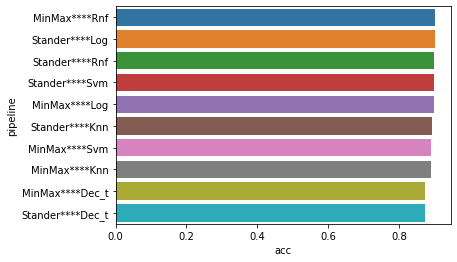

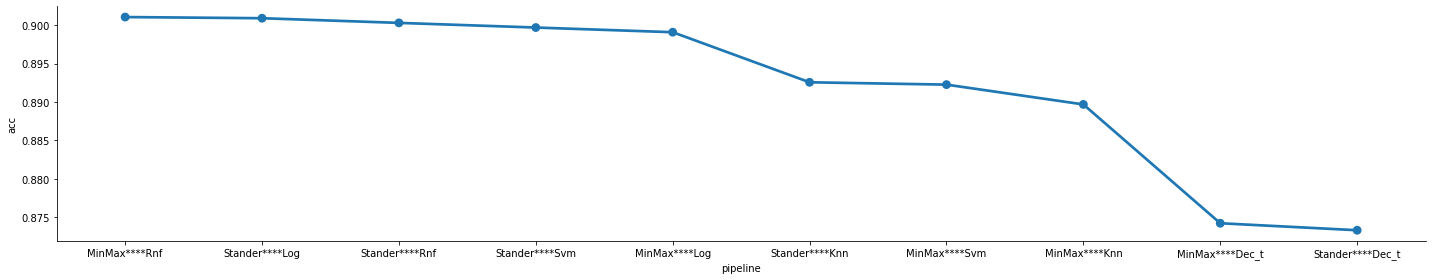

In [25]:
fir_res_mod1()

In [26]:
X

,age,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,49,227,4,999,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
1,37,202,2,999,1,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,78,1148,1,999,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
3,36,120,2,999,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
4,59,368,2,999,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,192,1,999,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
32946,52,64,1,999,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
32947,54,131,4,999,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
32948,29,165,1,999,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [27]:
bk4.rename(columns={"y_yes" : "y"},inplace=True)
bk4

,age,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y
0,49,227,4,999,0,1,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
1,37,202,2,999,1,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,78,1148,1,999,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,1
3,36,120,2,999,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,59,368,2,999,0,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,192,1,999,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
32946,52,64,1,999,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
32947,54,131,4,999,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
32948,29,165,1,999,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [28]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   y_yes   32950 non-null  uint8
dtypes: uint8(1)
memory usage: 32.3 KB


In [29]:
y=y.astype('int')

In [30]:
y.value_counts()

y_yes
0        29238
1         3712
dtype: int64

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
from sklearn.decomposition import PCA

In [33]:
pa=PCA(n_components=8)
pa.fit(X)
x=pa.transform(X)

In [34]:
std =StandardScaler()



In [35]:
X=std.fit_transform(X)

In [36]:
X_train

,age,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
26465,30,147,1,999,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1387,48,124,1,999,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
22628,37,161,1,999,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
8336,39,202,1,999,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
19898,52,258,3,999,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16850,60,118,1,999,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6265,31,328,4,999,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
11284,29,725,2,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
860,36,15,7,999,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0


In [37]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_prd=rf.predict(X_test)
print(accuracy_score(y_prd,y_test),"****\n",confusion_matrix(y_prd,y_test))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.8998482549317147 ****
 [[5641  503]
 [ 157  289]]


In [38]:
log=LogisticRegression()
log.fit(X_train,y_train)
y_prd=log.predict(X_test)
print(accuracy_score(y_prd,y_test),"****\n",confusion_matrix(y_prd,y_test))

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8984825493171472 ****
 [[5673  544]
 [ 125  248]]


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [39]:
l = []
maxi = 0
ind = 0
best = 0
best_predict = 0
for i in range (1, 100):
    kcla = RandomForestClassifier(n_estimators = i)
    kcla.fit(X_train, y_train)
    predict = kcla.predict(X_test)
    acu = accuracy_score(predict, y_test)
    l.append(acu)
    if maxi < acu :
        maxi = acu
        ind = i
        best = acu
        best_predict = predict

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was pas

Accuracy using Log is: 90.34901365705615 %


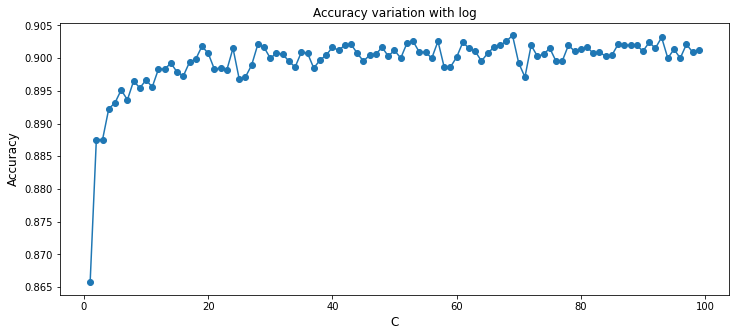

In [40]:
plt.figure(figsize = (12,5))
plt.plot(range (1, 100), l, marker = 'o')
plt.xlabel('C', size = 12)
plt.ylabel('Accuracy', size = 12)
plt.title('Accuracy variation with log', size = 12)
print("Accuracy using Log is: {} %".format(maxi*100))

In [41]:
kernal1=['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
for i in kernal1:
    
    log=SVC(kernel=i,C=8)
    print(i)
    print(accuracy_score(y_prd,y_test),"****\n",confusion_matrix(y_prd,y_test))
    print("*****")
    

linear
0.8984825493171472 ****
 [[5673  544]
 [ 125  248]]
*****
poly
0.8984825493171472 ****
 [[5673  544]
 [ 125  248]]
*****
rbf
0.8984825493171472 ****
 [[5673  544]
 [ 125  248]]
*****
sigmoid
0.8984825493171472 ****
 [[5673  544]
 [ 125  248]]
*****
precomputed
0.8984825493171472 ****
 [[5673  544]
 [ 125  248]]
*****


Accuracy using Log is: 90.34901365705615 %


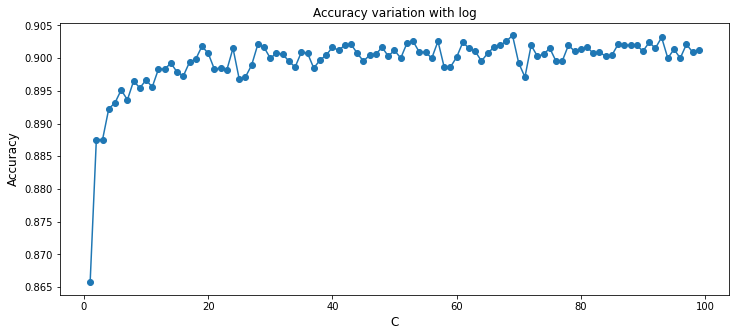

In [42]:
plt.figure(figsize = (12,5))
plt.plot(range (1, 100), l, marker = 'o')
plt.xlabel('C', size = 12)
plt.ylabel('Accuracy', size = 12)
plt.title('Accuracy variation with log', size = 12)
print("Accuracy using Log is: {} %".format(maxi*100))

# the Best score is 90.4%